In [ ]:
from langgraph.graph import StateGraph,START,END
from langchain_huggingface import HuggingFaceEndpoint,ChatHuggingFace


In [ ]:
from typing import TypedDict

In [30]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

# ✅ Correct TypedDict
class Bmistate2(TypedDict, total=False):
    weight_kg: float
    height_m: float
    bmi: float
    category: str


# ✅ Node 1: calculate BMI
def bmi_calculator(state: Bmistate2) -> Bmistate2:
    weight = state["weight_kg"]
    height = state["height_m"]

    bmi = weight / (height ** 2)

    return {
        **state,              # ✅ keep old state
        "bmi": round(bmi, 2)  # ✅ add new key
    }


# ✅ Node 2: label BMI
def bmi_content(state: Bmistate2) -> Bmistate2:
    bmi = state["bmi"]

    if bmi < 18.5:
        category = "Underweight"
    elif bmi < 25:
        category = "Normal"
    elif bmi < 30:
        category = "Overweight"
    else:
        category = "Obese"

    return {
        **state,
        "category": category
    }


# ✅ Build graph
graph = StateGraph(Bmistate2)

graph.add_node("calculate_bmi", bmi_calculator)
graph.add_node("labeled_bmi", bmi_content)

graph.add_edge(START, "calculate_bmi")
graph.add_edge("calculate_bmi", "labeled_bmi")
graph.add_edge("labeled_bmi", END)

flow = graph.compile()


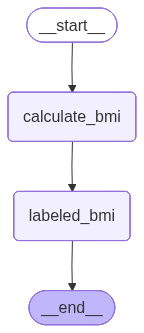

In [31]:
flow

In [35]:
initial_state = {
    "weight_kg": 34,
    "height_m": 6.5
}

final_state = flow.invoke(initial_state)
print(final_state['category'])


Underweight
